# 4.2.3 Clustering Methods Comparison

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Four Blobs (same distance)

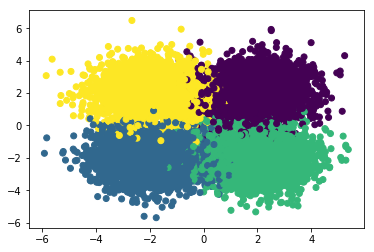

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Four Blobs - K Means

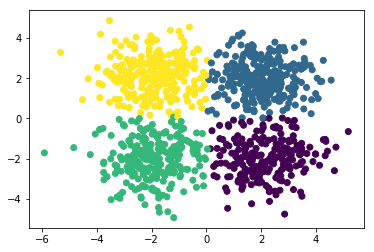

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        5    6  226    0
1      260    0    3    2
2        0  228    9    7
3        8    5    0  241


In [3]:
from sklearn.cluster import KMeans

# Calculate predicted values.
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

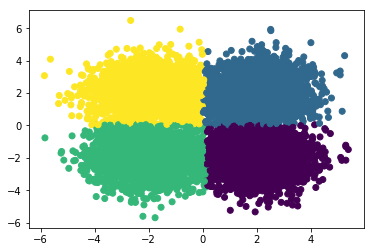

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0        55    46  2139     1
1      2116     0    49    50
2         2  2172    72    51
3        54    43     2  2148
Centers:
[[ 2.17036242 -1.96886411]
 [ 2.03629633  2.00616566]
 [-1.9117566  -2.03311251]
 [-1.95131037  2.15794269]]


In [4]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

## Four Blobs - Mean-shift

In [5]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


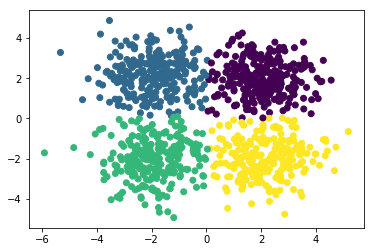

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0
Centers:
[[ 2.00101759  1.96957879]
 [-1.88967966  2.1194215 ]
 [-1.79761646 -1.94778711]
 [ 2.07752249 -1.93128355]]


In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

print('Centers:')
print(ms.cluster_centers_)

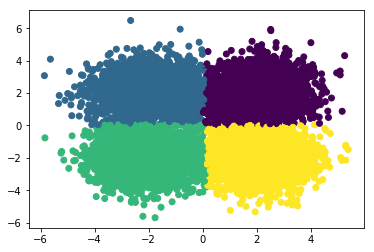

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0      2114     0    48    48
1        56    39     1  2148
2         2  2178    73    53
3        55    44  2140     1


In [7]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

Not bad at all.

## Four Blobs - Spectral clustering

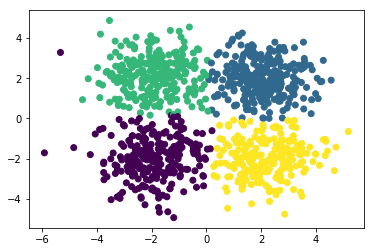

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  262    8    3
1      228    0    5    6
2       11    3    1  223
3       10    2  238    0


In [8]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

These clusters look familiar, though the one dot at top left is interesting.

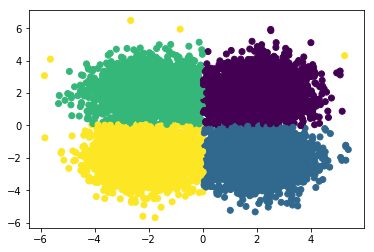

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0      2124    49    51     3
1         1    57    42  2161
2        53  2151     2    56
3        53     2  2141    54


In [9]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

## Four Blobs - Affinity propagation

In [10]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 25


Affinity propagation is known to overestimate the number of clusters – in this case, we have an absolutely absurd number.  Let's see what that looks like:

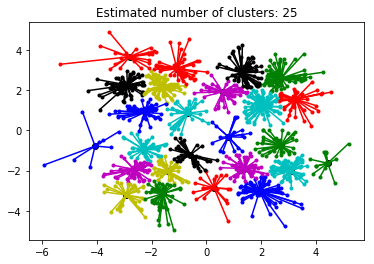

In [11]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

For four blobs, the k means and mean shift are best at predicting clusters without producing outliers.  Spectral clustering predicted clusters pretty well, but did have some outliers in the data. Affinity propogation predicted fewer clusters (than with 3 clusters at the same distance), but still overpredicted the number of clusters.

# Three Blobs (closer distance)

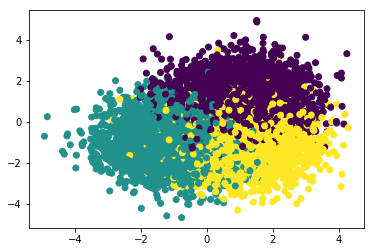

In [12]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[1, 1], [-1, -1], [1, -1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Three Close Blobs - K Means

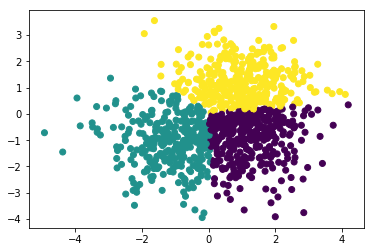

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0       67   51  235
1       12  256   42
2      283   13   41


In [13]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

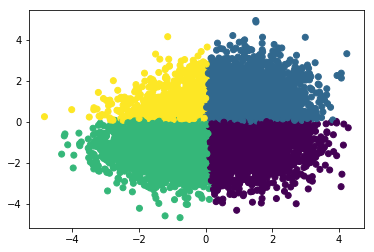

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0       384   351  2077
1      2092    70   402
2        96  2221   477
3       400   371    59
Centers:
[[ 2.17036242 -1.96886411]
 [ 2.03629633  2.00616566]
 [-1.9117566  -2.03311251]
 [-1.95131037  2.15794269]]


In [14]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

## Three Close Blobs - Mean-shift

In [15]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


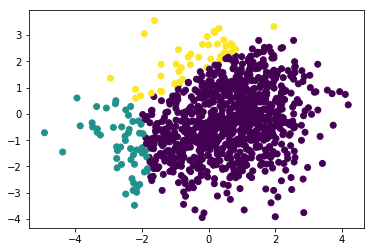

Comparing the assigned categories to the ones in the data:
col_0    0   1   2
row_0             
0      329   0  33
1      260  52   8
2      315   1   2


In [16]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Overestimating one blob over the others.

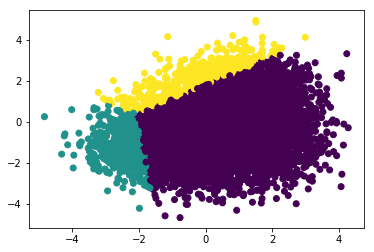

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0      2622  2402  2998
1         1   530    10
2       349    81     7


In [17]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

## Three Close Blobs - Spectral clustering

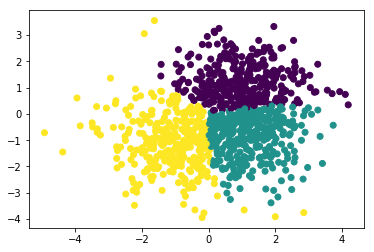

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      276   72   14
1       12   52  256
2       38  234   46


In [18]:
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

These clusters look familiar, though the top and bottom yellow points are interesting.

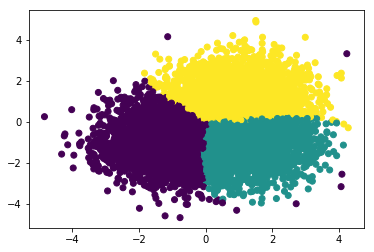

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0       169   449  2354
1      2444   429   140
2       433  2201   381


In [19]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

## Three Close Blobs - Affinity propagation

In [20]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 36


Affinity propagation is known to overestimate the number of clusters – in this case, we have an absolutely absurd number.  Let's see what that looks like:

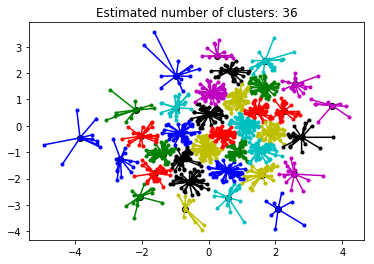

In [21]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Again, K means was pretty good a predicting blobs when the blobs were closer together.  Spectral clustering was also pretty good, but predicted some outliers.  Mean shift was much worse at predicting when the blobs were closer together, and affinity propogation was worst at predicting, again providing an extreme number of clusters from the data.

# Three Blobs (farther distance)

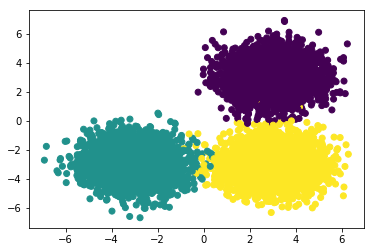

In [22]:
# The coordinates of the centers of our blobs.
centers = [[3, 3], [-3, -3], [3, -3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Three Far Blobs - K Means

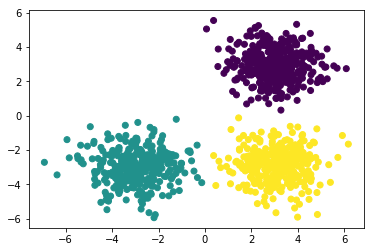

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0  319    1
2        0    1  317


In [23]:
# Calculate predicted values.
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

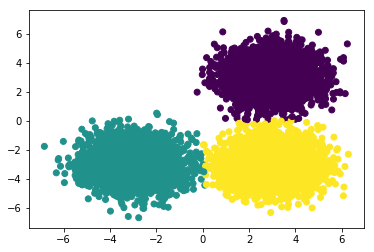

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0      2969     0     2
1         0  3008    10
2         3     5  3003
Centers:
[[ 3.02124887  2.96991368]
 [-2.95185115 -3.01756812]
 [ 3.0779662  -2.86929515]]


In [24]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

## Three Far Blobs - Mean-shift

In [25]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.3, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


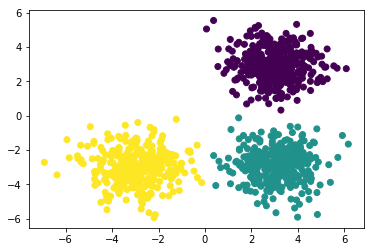

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0    1  319
2        0  317    1


In [26]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Almost perfect clustering

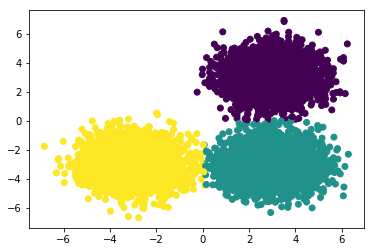

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0      2969     0     2
1         3     5  3002
2         0  3008    11


In [27]:
y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

## Three Far Blobs - Spectral clustering

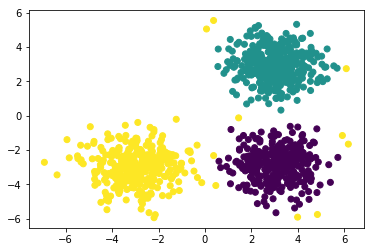

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  359    3
1        0    0  320
2      311    0    7


In [28]:
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

The last blob always seems to have some outliers in it.  Now they're as far as at (+6,+3)!

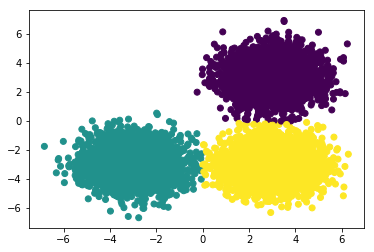

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0      2970     0     2
1         0  3008     5
2         4     7  3004


In [29]:
#Predicted clusters.
y_pred = sc.fit_predict(X_test)

#Graph results.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_test,y_pred))

## Three Far Blobs - Affinity propagation

In [30]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 49


Affinity propagation is known to overestimate the number of clusters – in this case, we have an absolutely absurd number.  Let's see what that looks like:

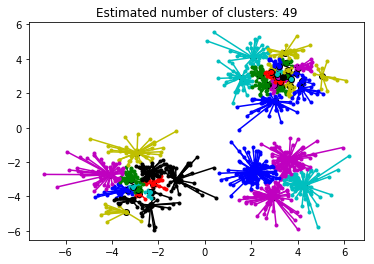

In [31]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

For three far blobs, the k means and mean shift were best at predicting clusters without producing outliers.  Spectral clustering predicted clusters pretty well, but did have some outliers in the data. Affinity propogation predicted more clusters (than with 3 clusters at a close distance), but still overpredicted the number of clusters.

# Summary

Overall, K means was most consistent across the different blob distributions.  Its accuracy decreased somewhat when the blob centers moved closer together, but remained fairly consistent otherwise.  

Mean shift was the next most consistent clustering model.  The test sets had fairly clean boarder areas, but when the blob centers got closer together, one of the clusters overpowered the other two blobs, skewing the center of the blobs. When the centers were farther from one another, mean shift did much better at correctly identifying blobs. 

Spectral clustering did fairly well in all cases, although when the cluster centers became closer together, there were a number of outliers on the other side of some blobs that were incorrectly labeled.  When the centers were farther away from one another, spectral clustering did a better job of correctly identifying data points.

Affinity propogation was overall the worst at predicting the number of clusters - predicting too many clusters for the data. When the blobs were farther apart, affinity propogation did a pretty good job of keeping the blobs separate, with identifiable blobs (albeit too many clusters per blob). 